In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using ProgressBars, JuMP, Gurobi

function mon(array)
  result = Float64[]
  last = array[1]
  for elt in array
    new_last = minimum([elt, last])
    push!(result, new_last)
    last = new_last
  end
  return result
end

const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

FERCinstances = []
for file in readdir("..//data//ferc"; join=true)
  push!(FERCinstances, UT.load_ferc_data(file))
end

instance = FERCinstances[1]
X0 = UT.LP_Relaxation(instance)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02


48-element Vector{Float64}:
 1319.6419068350617
 1252.195822173104
 1248.10935266
 1240.19356528
 1240.19356528
 1256.02514004
 1293.1677609141902
 1282.7174849512342
 1281.07525201
 1281.07525201
    ⋮
 1248.10935266
 1240.19356528
 1418.56706254
 1526.804188599192
 1324.59899869
 1329.38031391
 1310.7964101106543
 1270.2269984417871
 1211.38773339

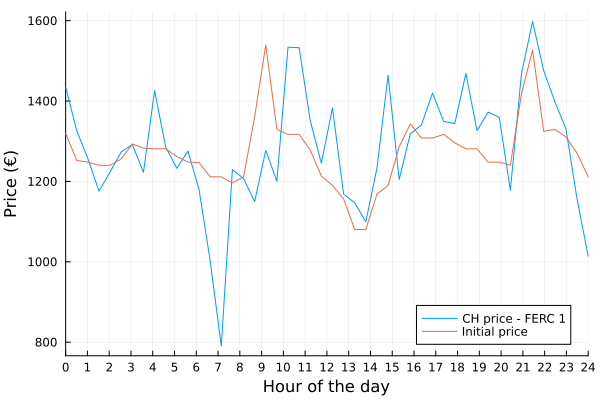

In [157]:
plot(LinRange(0, 24, 48), ITBLM[argmax(BLM) + 1], xlabel="Hour of the day", ylabel="Price (€)", xlims=(0, 24), label="CH price - FERC 1", xticks=0:1:24)
plot!(LinRange(0, 24, 48), X0, label="Initial price")

In [8]:
for idx = 1:20
  FS = maximum(load_object("..//results//optimal_values//NewOptRunCA$(idx).jld2")[3])
  _, _, Polyak, TPolyak = load_object("..//results//15min_runs//PolyakMethodCA$(idx).jld2")
  _, _, DA, TDA = load_object("..//results//15min_runs//D-AdaptationCA$(idx).jld2")
  _, _, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodCA$(idx).jld2")
  _, _, DWG, TDWG = load_object("..//results//15min_runs//DowGCA$(idx).jld2")
  _, _, SG, TSG = load_object("..//results//15min_runs//SubGCA$(idx).jld2")
  _, _, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-CA$(idx).jld2")

  choice = argmin([FS - maximum(DA), FS - maximum(BLM), FS - maximum(DWG), FS - maximum(SG), FS - maximum(SGEP)])
  listMethod = ["DA", "BLM", "DWG", "SG", "SG-EP"]
  @info "idx = $idx ; winner = $(listMethod[choice])"
  @show length(DA)
  @show length(BLM)
  @show length(Polyak)
  @show length(DWG)
  @show length(SG)
  @show length(SGEP)
  #= plot(TPolyak, mon(FS .- (Polyak)), label = "Polyak")
  plot(TDA[2:end], mon(FS .- (DA)), label="DA")
  plot!(TBLM[2:end], mon(FS .- (BLM)), label="BLM")
  plot!(TDWG[2:end], mon(FS .- (DWG)), label="DWG")
  plot!(TSG[2:end], mon(FS .- (SG)), label="SG") =#
end

length(DA) = 275
length(BLM) = 95
length(Polyak) = 254
length(DWG) = 220
length(SG) = 124
length(SGEP) = 558
length(DA) = 108
length(BLM) = 90
length(Polyak) = 259
length(DWG) = 211
length(SG) = 120
length(SGEP) = 555
length(DA) = 92
length(BLM) = 129
length(Polyak) = 265
length(DWG) = 215
length(SG) = 114
length(SGEP) = 559
length(DA) = 93
length(BLM) = 147
length(Polyak) = 272
length(DWG) = 214
length(SG) = 123
length(SGEP) = 555
length(DA) = 112
length(BLM) = 159
length(Polyak) = 282
length(DWG) = 206
length(SG) = 174
length(SGEP) = 568
length(DA) = 169
length(BLM) = 159
length(Polyak) = 289
length(DWG) = 215
length(SG) = 386
length(SGEP) = 565
length(DA) = 171
length(BLM) = 330
length(Polyak) = 293
length(DWG) = 234
length(SG) = 573
length(SGEP) = 571
length(DA) = 160
length(BLM) = 378
length(Polyak) = 295
length(DWG) = 103
length(SG) = 575
length(SGEP) = 566
length(DA) = 165
length(BLM) = 386
length(Polyak) = 306
length(DWG) = 104
length(SG) = 579
length(SGEP) = 580
length(DA) = 1

┌ Info: idx = 1 ; winner = SG-EP
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 2 ; winner = SG-EP
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 3 ; winner = SG-EP
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 4 ; winner = SG-EP
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 5 ; winner = SG-EP
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 6 ; winner = SG-EP
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 7 ; winner = BLM
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 8 ; winner = BLM
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 9 ; winner = SG-EP
└ @

length(DA) = 130
length(BLM) = 352
length(Polyak) = 525
length(DWG) = 106
length(SG) = 352
length(SGEP) = 533
length(DA) = 129
length(BLM) = 348
length(Polyak) = 522
length(DWG) = 113
length(SG) = 161
length(SGEP) = 530
length(DA) = 101
length(BLM) = 350
length(Polyak) = 527
length(DWG) = 121
length(SG) = 159
length(SGEP) = 534
length(DA) = 85
length(BLM) = 347
length(Polyak) = 524
length(DWG) = 205
length(SG) = 161
length(SGEP) = 530


┌ Info: idx = 17 ; winner = DWG
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 18 ; winner = DWG
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 19 ; winner = DWG
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12
┌ Info: idx = 20 ; winner = DWG
└ @ Main /home/sofiane/Documents/ConvexHullPricing.jl/notebooks/optimal_values.ipynb:12


In [ ]:
idx = 1 # BE: 2, 3, 7 ça va pas, 8 // CA: 9, 10, 11, 12 : initialization at X*. 
XstarP, IteratesP, FunIteratesP, TimeVectorP = load_object("..//results//15min_runs//PolyakMethodBE$(idx).jld2")
XstarDA, IteratesDA, FunIteratesDA, TimeVectorDA = load_object("..//results//15min_runs//D-AdaptationBE$(idx).jld2")
_, _, fs, tv = load_object("..//results//optimal_values//NewOptRunBE$(idx).jld2")
Xstar, Iterates, FunIterates, TimeVector = load_object("..//results//15min_runs//SubGBE$(idx).jld2")
XstarDWG, IteratesDWG, FunIteratesDWG, TimeVectorDWG = load_object("..//results//15min_runs//DowGBE$(idx).jld2")
@show maximum(fs) - maximum(FunIteratesP)
@show maximum(fs) - maximum(FunIteratesDA)
@show maximum(fs) - maximum(FunIterates)
@show maximum(fs) - maximum(FunIteratesDWG)

plot(TimeVectorP, mon(maximum(fs) .- FunIteratesP), label="Polyak", xlims = (0, 900))
plot!(TimeVector[2:end], mon(maximum(fs) .- FunIterates), label="SUBG")
plot!(tv[2:end], mon(maximum(fs) .- fs), label="long BLM")
plot!(TimeVectorDA[2:end], mon(maximum(fs) .- FunIteratesDA), label="D-Adaptation")
plot!(TimeVectorDWG[2:end], mon(maximum(fs) .- FunIteratesDWG), label="DowG")

In [ ]:
Xstar1, Iterates1, FunIterates1, TimeVector1 = load_object("..//results//optimal_values//NewOptRunBE1.jld2")
Xstar2, Iterates2, FunIterates2, TimeVector2 = load_object("..//results//optimal_values//NewOptRunBE2.jld2")
Xstar3, Iterates3, FunIterates3, TimeVector3 = load_object("..//results//optimal_values//NewOptRunBE3.jld2")
Xstar4, Iterates4, FunIterates4, TimeVector4 = load_object("..//results//optimal_values//NewOptRunBE4.jld2")
Xstar5, Iterates5, FunIterates5, TimeVector5 = load_object("..//results//optimal_values//NewOptRunBE5.jld2")
Xstar6, Iterates6, FunIterates6, TimeVector6 = load_object("..//results//optimal_values//NewOptRunBE6.jld2")
Xstar7, Iterates7, FunIterates7, TimeVector7 = load_object("..//results//optimal_values//NewOptRunBE7.jld2")
Xstar8, Iterates8, FunIterates8, TimeVector8 = load_object("..//results//optimal_values//NewOptRunBE8.jld2")
XstarP1, IteratesP1, FunIteratesP1, TimeVectorP1 = load_object("..//results//15min_runs//PolyakMethodBE1.jld2")
XstarP2, IteratesP2, FunIteratesP2, TimeVectorP2 = load_object("..//results//15min_runs//PolyakMethodBE2.jld2")
XstarP3, IteratesP3, FunIteratesP3, TimeVectorP3 = load_object("..//results//15min_runs//PolyakMethodBE3.jld2")
XstarP4, IteratesP4, FunIteratesP4, TimeVectorP4 = load_object("..//results//15min_runs//PolyakMethodBE4.jld2")

In [ ]:
plot(LinRange(0, 24, 96), Iterates1[argmax(FunIterates1)+1], xlabel="Hour of the day", ylabel="Price (€)", xlims=(0, 24), label="CH price - BE Autumn Week Day", xticks=0:1:24)
plot!(LinRange(0, 24, 96), Iterates2[argmax(FunIterates2)+1], label="CH price - BE Autumn Week-End")
plot!(LinRange(0, 24, 96), Iterates3[argmax(FunIterates3)+1], label="CH price - BE Spring Week Day")
plot!(LinRange(0, 24, 96), Iterates4[argmax(FunIterates4)+1], label="CH price - BE Spring Week-End")
plot!(LinRange(0, 24, 96), Iterates5[argmax(FunIterates5)+1], label="CH price - BE Summer Week Day")
plot!(LinRange(0, 24, 96), Iterates6[argmax(FunIterates6)+1], label="CH price - BE Summer Week-End")
plot!(LinRange(0, 24, 96), Iterates7[argmax(FunIterates7)+1], label="CH price - BE Winter Week Day")
plot!(LinRange(0, 24, 96), Iterates8[argmax(FunIterates8)+1], label="CH price - BE Winter Week-End")